# **Foreign Exchange Rates 2000-2019**

This notebook was run on this dataset - https://www.kaggle.com/datasets/brunotly/foreign-exchange-rates-per-dollar-20002019

Also, this notebook was run on Google Colab and then imported into Kaggle.

# **Contents**


1.   Import Libraries

2.   Data Sourcing

3.   Data Wrangling

4.   Exploratory Data Analysis

5.   Model Training

6.   Model Evaluation



# **1- Import Libraries**

Import all the necessary libraries to be used in this notebook. I prefer to do this at the initial stage and added more libraries as the project progresses. These section was done is two aspect, the libraries installation and libraries import.

**1.1 Libraries installed**

**plotly_express** is a high-level interface to plotly that can be used for interactive visualizations and plots with a variety of data.

In [ ]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Pip install pystan** AND **pip install fbprophet**: These libraries are required to use the Prophet model that is already available under the fbprophet library.

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1.2 Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

print("Setup Completed!!!")

Setup Completed!!!


# **2. Data Sourcing**

For this project I was able to get a foreign exchange dataset from Kaggle and Pandas library was used to load the dataset as a comma separated values(.csv) file format which was downloaded from Kaggle to our machine.

In [ ]:
df = pd.read_csv('/content/Foreign_Exchange_Rates.csv')

# **3. Data Wrangling**

In [ ]:
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [ ]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 5217 rows and 24 columns in the dataset.


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

Let's extract one country's data and try to understand its behaviour. We'll take UK for illustration purpose. All our EDA and model building will revolve around UK.

In [ ]:
data = df[['Time Serie', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$']]
data.columns = ['date', 'rate']

In [ ]:
data.head(15)

,date,rate
0,03-01-2000,0.6146
1,04-01-2000,0.6109
2,05-01-2000,0.6092
3,06-01-2000,0.607
4,07-01-2000,0.6104
5,10-01-2000,0.6107
6,11-01-2000,0.6068
7,12-01-2000,0.6073
8,13-01-2000,0.6067
9,14-01-2000,0.6115


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5217 non-null   object
 1   rate    5217 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


In [ ]:
data.rate.describe()

count     5217
unique    2303
top         ND
freq       198
Name: rate, dtype: object

On looking at the datatype for our variables using the .info() method, we see that both the variables are of Object type. In order to perform our analysis, we’ll have to change the datatypes of both the columns.


**Note: We can see that we have some value 'ND**' in our dataset. Let's remove these values to ensure we are able to make forecasting accurately. We are not sure of what ND means (Maybe it stands for No Data).
We'll first replace the ND with NaN and then impute some other values instead of NaN.

In [ ]:
# Replacing the ND values with NaN values.
data.rate.replace('ND', np.nan, inplace=True)

In [ ]:
# We can see that there are a total of 198 NaN values in our dataset.
data.rate.isna().sum()

198

We have successfully replaced all the ND values in our dataset with NaN value. Let's now work on replacing these null values with some method or other.

In [ ]:
# Converting the datatype from Object to datetime and numeric.
from datetime import datetime, date 
data['date'] = pd.to_datetime(data.date, format = '%d-%m-%Y')
data['rate'] = pd.to_numeric(data.rate)

In [ ]:
# Checking the data type of variables after making the changes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5217 non-null   datetime64[ns]
 1   rate    5019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.6 KB


In [ ]:
# Since we have NaN values in our dataset, we can replace them using the
# interpolate() function to fill in our missing values.
data['rate'] = data['rate'].interpolate()

In [ ]:
# Sort values by timestamp (not necessary in this case)
df = data.sort_values(by='date')

# Check time intervals
df['Time_Interval'] = data.date - data.date.shift(1)

df[['date', 'Time_Interval']].head()

,date,Time_Interval
0,2000-01-03,NaT
1,2000-01-04,1 days
2,2000-01-05,1 days
3,2000-01-06,1 days
4,2000-01-07,1 days


In [ ]:
print(f"{df['Time_Interval'].value_counts()}")
df = df.drop('Time_Interval', axis=1)

1 days    4173
3 days    1043
Name: Time_Interval, dtype: int64


There is a difference of 3 between the number of days other than 1 in our dataset. This is simply because of the fact that stock market is closed on weekends.

Since we have missing data for every 2 days of our week, we can downsample our dataset from days to weeks for better analysis and forecasting.

In [ ]:
data.set_index('date', inplace=True)

In [ ]:
# Resampling the data from days to week using the resmaple() method.
data = data.resample('W-MON', label='left', closed='left').mean()

In [ ]:
data.head()

,rate
date,
2000-01-03,0.61042
2000-01-10,0.60860
2000-01-17,0.60808
2000-01-24,0.60998
2000-01-31,0.62244


Let's make a copy of our dataset in case we might need it for future purposes.

In [ ]:
data1 = data.copy()

# **3. Exploratory Data Analysis**

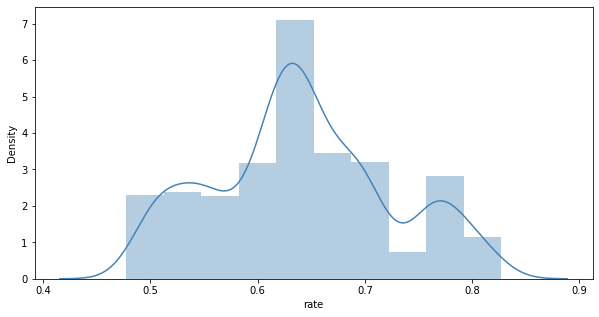

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue')

From the above graph, we can see that our UK Exchange Rates follows more or less a Gaussian Distribution.


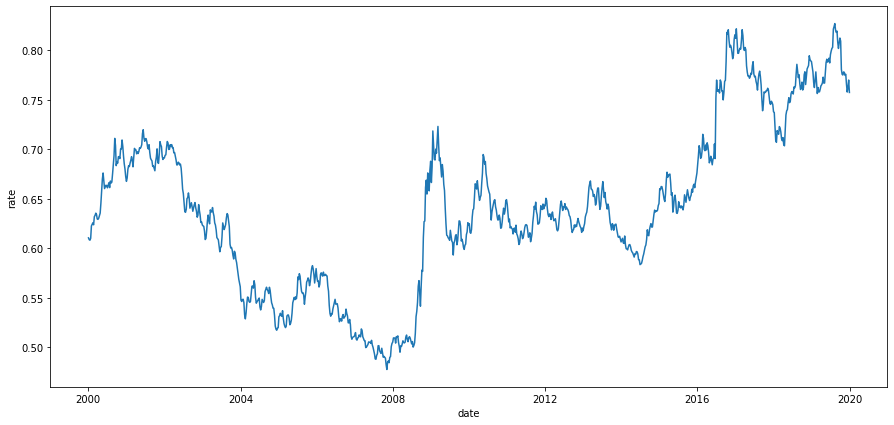

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x = data.index, y= data.rate)

On looking at the line plot for the above data, we can see that the data is non-stationary, with a trend in the dataset, but no observable Seasonality.

Also, we'll choose additive instead of multiplicative method of decomposition since there is no exponential increase in the amplitudes over time.


In [ ]:
# Decomposing the dataset to see all kind of components of our time series.
decomp = seasonal_decompose(data['rate'],  model='additive')

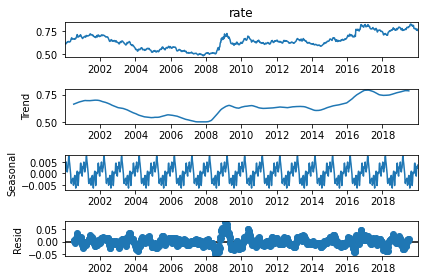

In [ ]:
decomp.plot();

??

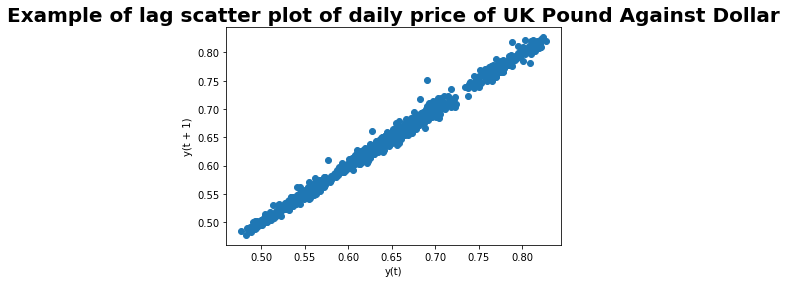

In [ ]:
lag_plot(series = data.rate)
plt.title('Example of lag scatter plot of daily price of UK Pound Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

Notes:
*   From the above lag plot, we can see that the values of exchange rates at time period T and T-1 are highly positively correlated which is evident from the coalesced datapoints moving from left to right upwards. This means that the values are highly dependent on the previous values.

In [ ]:
values = pd.DataFrame(data.rate.values)
lags = 7
columns = [values]

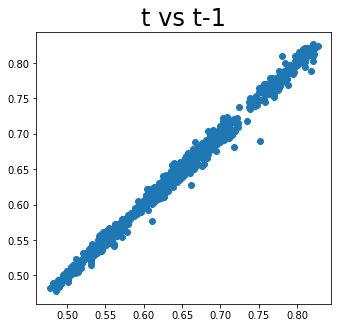

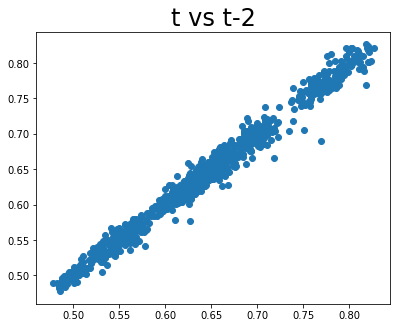

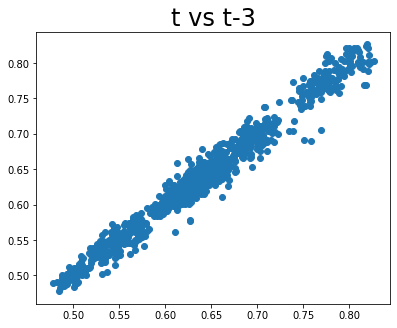

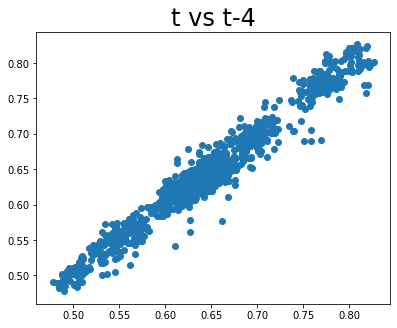

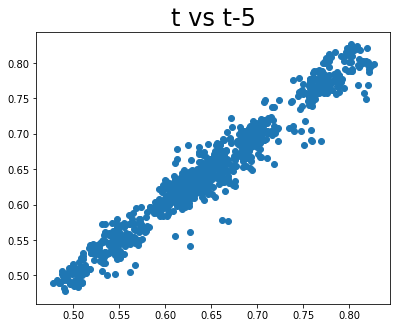

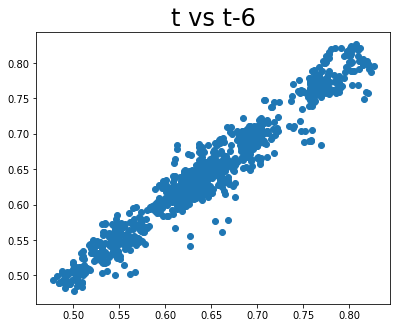

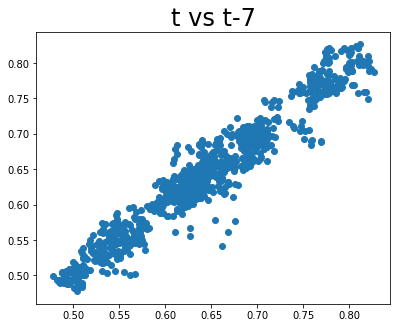

In [ ]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(5,4))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

As seen above, to identify how strong the correlation is between the series at time t and its lags (t-1,t-2, etc.), we used the lag_plot() method to plot the values. The values were plotted for a total of 7 lags, and we can see that there is strong correlation between the values at time t with each lag period.

As we can also see from above lag plots, for 7 different lag values, there is high positive correlation among each one of them with values at time t.

Let's perform ADF Test to confirm stationarity/non-stationarity of our dataset.


In [ ]:
result = adfuller(data['rate'].tolist())
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.310049
p-value 0.624563
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


<Figure size 864x432 with 0 Axes>

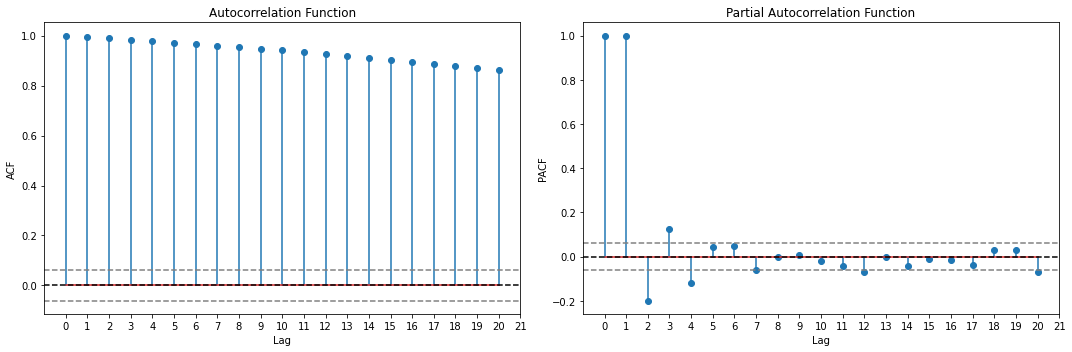

In [ ]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data.rate, nlags = 20)
lag_pacf = pacf(data.rate, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

*   Since our Test Statistic value is greater than our critical value at 5%, we can say that our time series is non-stationarity.

*   We can also see from our ACF plot that there is high correlation between time series at time t and various other lag values. There is also no sign of any kind of seasonality.

Thus, we will difference our series once (as there is only trend) to see if this removes stationarity.

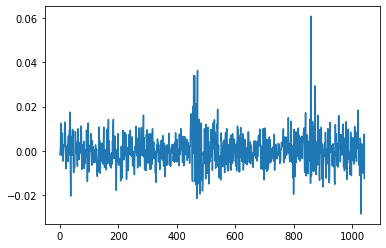

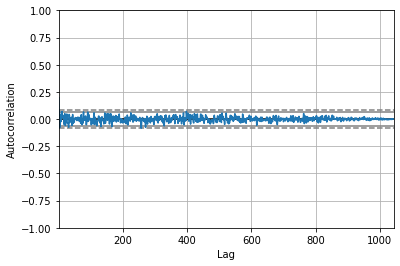

In [ ]:
diff = list()
for i in range(1, len(data)):
  value = data['rate'].tolist()[i] - data['rate'].tolist()[i-1]
  diff.append(value)

# line plot

plt.plot(diff)
plt.show()

# Auto-correlation plot

pd.plotting.autocorrelation_plot(diff)
plt.show()

Notes:
*  From the first line plot, we can see that the differenced time series has a mean close to 0 and a very small variance.

*  This shows us that the data has become stationary now. Also, from the autocorrelation plot, we can see that the AC values at different lags are now close to zero. This is also a sign of stationarity. But we'll again run the ADF test to check for stationarity.

In [ ]:
result = adfuller(diff)

print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.571511
p-value 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


We can see that our p-value is now approximately close to 0, so we can say that our time-series is now stationary.

<Figure size 864x432 with 0 Axes>

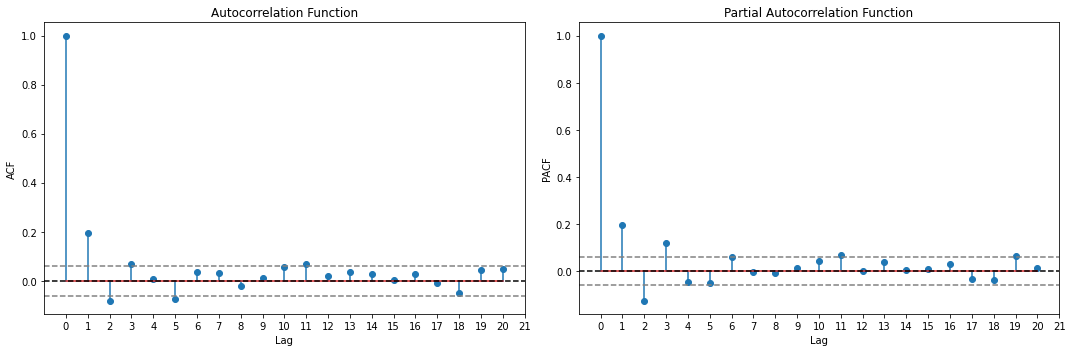

In [ ]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

From the above AC and PACF plots (Lollipop charts), we can see that the initial lag values show a correlation with previous values. We'll have to select the appropriate values of p and q for building our ARIMA model, and this will be done using the Lollipops chart above. The p and q values are 3,2 respectively, as after these, the lollipops in our charts go below the band of error and are no more significant.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# **4. Model Training**

We will now be looking to build 3 models, namely Regression, ARIMA, FBProphet, and LSTM.

But before we start building our model, we will need the appropriate values of p,d,q for ARIMA.

1. We know, the value of p is obtained from the PACF plot, d is the number of times we have differenced our time-series (which is 1 in this case), and q is obtained from the ACF plot.

2. On plotting our ACF and PACF plots with the differenced data (also called as lollipop charts), we can see that the p and q values turn out to be 3 and 2 respectively. We identify the p and q values by identifying where the lollipops are out of the band of error and the moment they start going inside the band of error, we stop and take that value as our p and q value.

In [ ]:
time = [i+1 for i in range(len(data))]
data['time'] = time

In [ ]:
data.head()

,rate,time
date,,
2000-01-03,0.61042,1
2000-01-10,0.60860,2
2000-01-17,0.60808,3
2000-01-24,0.60998,4
2000-01-31,0.62244,5


# REGRESSION ON TIME

In [ ]:
# Splitting the dataset into train as first 900 weeks data, and test as last 144 weeks data.
train = data[:900]
test = data[900:]

In [ ]:
X_train = train.drop('rate',axis=1)
X_test = test.drop('rate',axis=1)
y_train = train[['rate']]
y_test = test[['rate']]

In [ ]:
from sklearn.linear_model import LinearRegression
#Define model
model = LinearRegression()

#fit model
model.fit(X = X_train, y = y_train)

#predict model
predictions = model.predict(X_test)

In [ ]:
y_test['RegOnTime'] = predictions

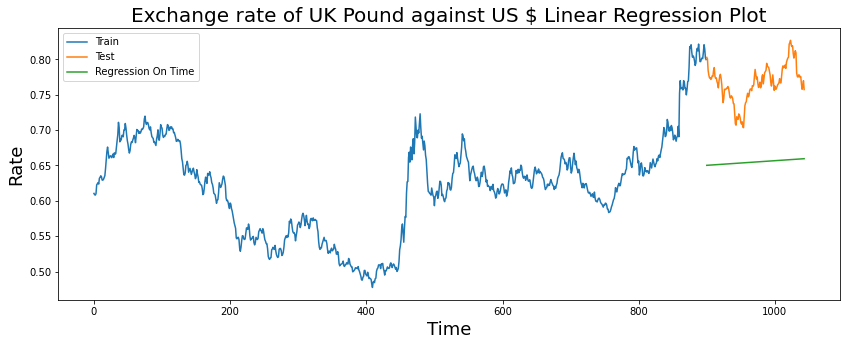

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_train['rate'].values, label = 'Train')   
plt.plot([None for i in y_train.values] + [x for x in y_test['rate'].values], label = 'Test')
plt.plot([None for i in y_train.values] + [x for x in y_test['RegOnTime'].values], label = 'Regression On Time')
plt.title('Exchange rate of UK Pound against US $ Linear Regression Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [ ]:
mean_absolute_percentage_error(y_test,predictions)

7.247130738773097

# ARIMA MODEL

In [ ]:
train = data[:900]
test = data[900:]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
predictions = []

arima = ARIMA(train.rate,order=(3,1,2)).fit()

In [ ]:
predictions.append(arima.forecast(144))

In [ ]:
predictions = np.array(predictions[0][0]).reshape((144,))

In [ ]:
test['arima_pred'] = predictions

In [ ]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.rate   No. Observations:                  899
Model:                 ARIMA(3, 1, 2)   Log Likelihood                3216.430
Method:                       css-mle   S.D. of innovations              0.007
Date:                Thu, 22 Sep 2022   AIC                          -6418.861
Time:                        07:02:53   BIC                          -6385.252
Sample:                    01-10-2000   HQIC                         -6406.021
                         - 03-27-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.737      0.461      -0.000       0.001
ar.L1.D.rate    -0.4102      0.190     -2.162      0.031      -0.782      -0.038
ar.L2.D.rate    -0.4680      0.146     -3.204      0.001      -0.754      -0.182
ar.L3.D.rate     0.1729      0.066      2.637      0.008       0.044       0.301
ma.L1.D.rate     0.6361      0.195      3.268      0.001       0.255       1.018
ma.L2.D.rate     0.4960      0.153      3.246      0.001       0.197       0.795
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5219           -1.1269j            1.2419           -0.3190
AR.2           -0.5219           +1.1269j            1.2419            0.3190
AR.3            3.7507           -0.0000j            3.7507           -0.0000
MA.1           -0.6413           -1.2669j            1.4199           -0.3246
MA.2           -0.6413           +1.2669j            1.4199            0.3246
-----------------------------------------------------------------------------
"""

PREDICTION VS OBSERVED GRAPH

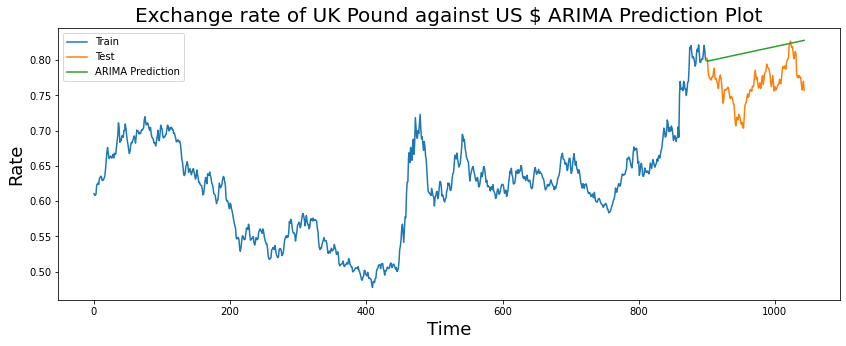

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(train['rate'].values, label = 'Train')   
plt.plot([None for i in train.values] + [x for x in test['rate'].values], label = 'Test')
plt.plot([None for i in train.values] + [x for x in test['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of UK Pound against US $ ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [ ]:
mean_absolute_percentage_error(test.rate, predictions)

6.183300385506722

# FBPROPHET

In [ ]:
data1.head()

,rate
date,
2000-01-03,0.61042
2000-01-10,0.60860
2000-01-17,0.60808
2000-01-24,0.60998
2000-01-31,0.62244


In [ ]:
data1.reset_index(inplace=True)

In [ ]:
data1 = data1.rename(columns={'date' : 'ds','rate' : 'y'})

In [ ]:
data1.head()

,ds,y
0,2000-01-03,0.61042
1,2000-01-10,0.60860
2,2000-01-17,0.60808
3,2000-01-24,0.60998
4,2000-01-31,0.62244


In [ ]:
data.shape

(1044, 2)

In [ ]:
training_data = data1[:900]
testing_data = data1[900:]

In [ ]:
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(training_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=144, freq='W')
future_dates.head()

,ds
0,2000-01-03
1,2000-01-10
2,2000-01-17
3,2000-01-24
4,2000-01-31


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-03,0.646819,0.599688,0.702341
1,2000-01-10,0.646984,0.593793,0.699068
2,2000-01-17,0.647253,0.592494,0.704292
3,2000-01-24,0.648140,0.596187,0.701249
4,2000-01-31,0.649190,0.595845,0.700900


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1039,2019-12-01,0.893376,0.725034,1.054184
1040,2019-12-08,0.892152,0.721883,1.046004
1041,2019-12-15,0.892611,0.727399,1.062022
1042,2019-12-22,0.894602,0.730488,1.051487
1043,2019-12-29,0.896567,0.721538,1.051734


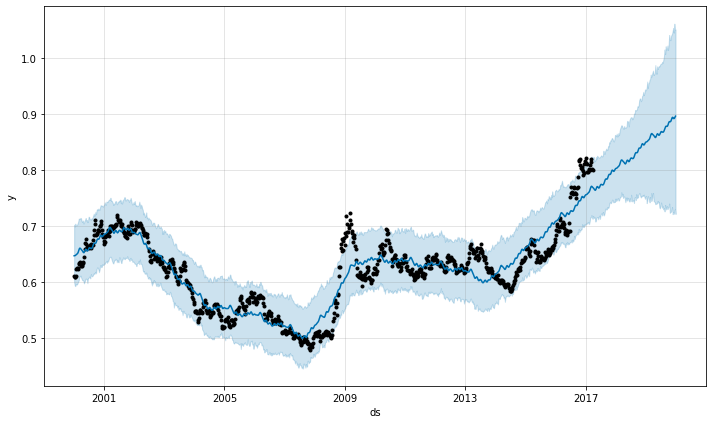

In [ ]:
my_model.plot(forecast, uncertainty=True);

In [ ]:
mean_absolute_percentage_error(testing_data.y, forecast[900:].yhat)

8.521415563561622

# LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data.head()

,rate,time
date,,
2000-01-03,0.61042,1
2000-01-10,0.60860,2
2000-01-17,0.60808,3
2000-01-24,0.60998,4
2000-01-31,0.62244,5


In [ ]:
dataset = data.rate.values
dataset = dataset.astype('float32')

In [ ]:
dataset = dataset.reshape(-1,1)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.86)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

897 147


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
895/895 - 4s - loss: 0.0395 - 4s/epoch - 5ms/step
Epoch 2/100
895/895 - 1s - loss: 0.0071 - 1s/epoch - 1ms/step
Epoch 3/100
895/895 - 1s - loss: 8.9592e-04 - 1s/epoch - 1ms/step
Epoch 4/100
895/895 - 1s - loss: 4.3770e-04 - 1s/epoch - 1ms/step
Epoch 5/100
895/895 - 1s - loss: 4.5360e-04 - 1s/epoch - 1ms/step
Epoch 6/100
895/895 - 1s - loss: 4.4501e-04 - 1s/epoch - 2ms/step
Epoch 7/100
895/895 - 1s - loss: 4.4827e-04 - 1s/epoch - 1ms/step
Epoch 8/100
895/895 - 1s - loss: 4.5569e-04 - 1s/epoch - 1ms/step
Epoch 9/100
895/895 - 1s - loss: 4.5031e-04 - 1s/epoch - 2ms/step
Epoch 10/100
895/895 - 1s - loss: 4.6008e-04 - 1s/epoch - 2ms/step
Epoch 11/100
895/895 - 1s - loss: 4.5174e-04 - 1s/epoch - 2ms/step
Epoch 12/100
895/895 - 3s - loss: 4.6221e-04 - 3s/epoch - 4ms/step
Epoch 13/100
895/895 - 3s - loss: 4.5659e-04 - 3s/epoch - 4ms/step
Epoch 14/100
895/895 - 2s - loss: 4.4225e-04 - 2s/epoch - 3ms/step
Epoch 15/100
895/895 - 2s - loss: 4.4817e-04 - 2s/epoch - 2ms/step
Epoch 16/100

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MAPE' % (trainScore))
testScore = np.sqrt(mean_absolute_percentage_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MAPE' % (testScore))

Train Score: 0.94 MAPE
Test Score: 0.87 MAPE


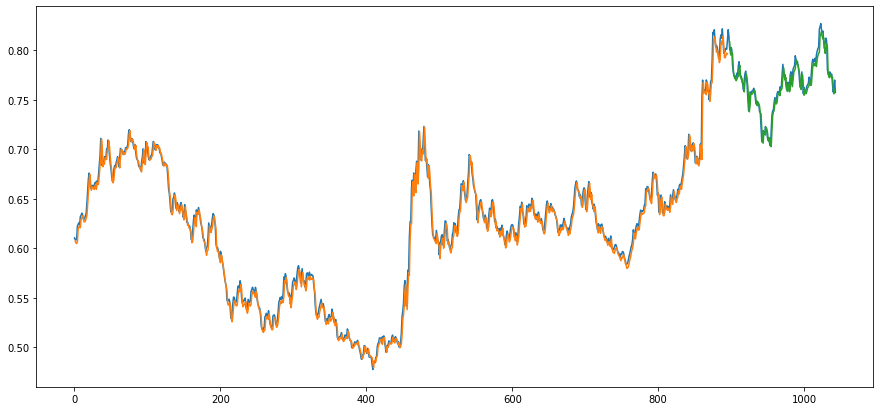

In [ ]:
plt.figure(figsize=(15,7))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### We can see our LSTM model performed the best for our predictions. Please feel free to add anything in comments and help me improve this notebook.